# NAME : ROSHANI CHAVAN

# The Sparks Foundation GRIPFEB21

# Problem Statement :

# Prediction Using Unsupervised ML

# From the given ‘Iris’ dataset, predict the optimum number of clusters

# and represent it visually.

# Algorithm : K Means Clustering

# Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

# Load the iris dataset

In [2]:
iris = pd.read_csv('Iris.csv')
print("The dataset has been loaded successfully")
#head() will show the first five rows
iris.head()

The dataset has been loaded successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Check if the data has any missing values

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [4]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Check out the dataset

In [5]:
iris.shape

(150, 6)

In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Visualize the data

D:\software\python\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


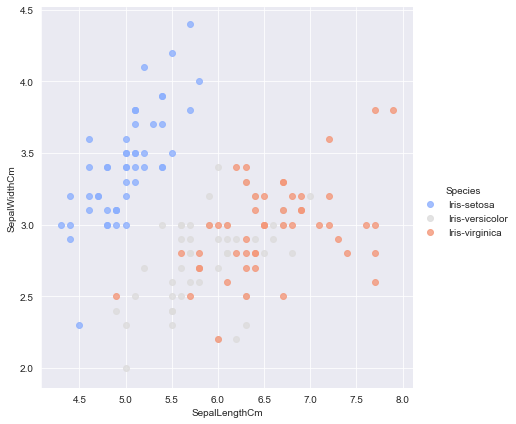

In [7]:
sns.set_style('darkgrid')
sns.lmplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,hue='Species',palette='coolwarm',size=6,aspect=1,fit_reg=False)

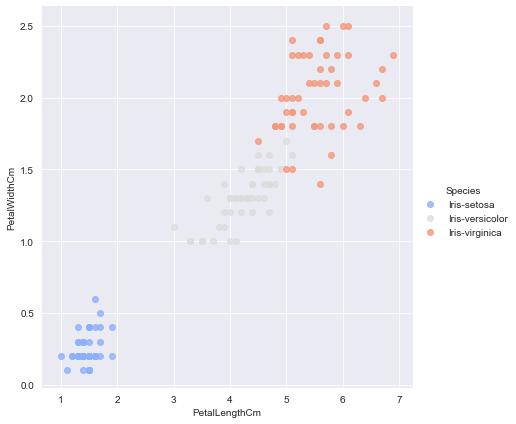

In [8]:
sns.set_style('darkgrid')
sns.lmplot(x='PetalLengthCm',y='PetalWidthCm',data=iris,hue='Species',palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [9]:
#We won't need id and Species column for predicting the clusters hance drop them
x=iris.drop(['Id','Species'],axis=1)
#check if the columns have been dropped
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Finding the optimum number of clusters for k-means classification

In [10]:
wcss=[]
for i in range(1,10):
    #k-means++ selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    #To train our model , we use kmeans.fit() here x is the dataset that has to be clustered
    kmeans.fit(x)
    #kmeans inertia_ attribute is Sum of squared distances of samples to their closest cluster center.
    wcss.append(kmeans.inertia_)

# Use Elbow method to determine the optimal number of clusters

Elbow method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

Text(0.5, 1.0, 'The Elbow Method')

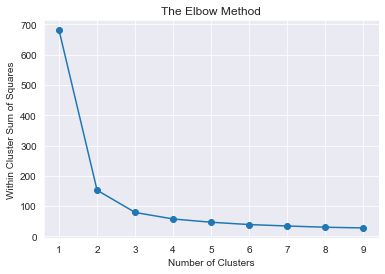

In [11]:
plt.plot(range(1,10),wcss,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('The Elbow Method')

The optimal number of clusters is 3.

# Apply KMeans to the dataset

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
#fit_predict method returns each observation which cluster it belongs to.
#The cluster to which client belongs and it will return this cluster numbers into a single vector that is  called y K-means
y_kmeans = kmeans.fit_predict(x)

In [13]:
centers = kmeans.cluster_centers_
print(centers)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


This array is representing the center of 3 clusters

# Visualising the clusters 

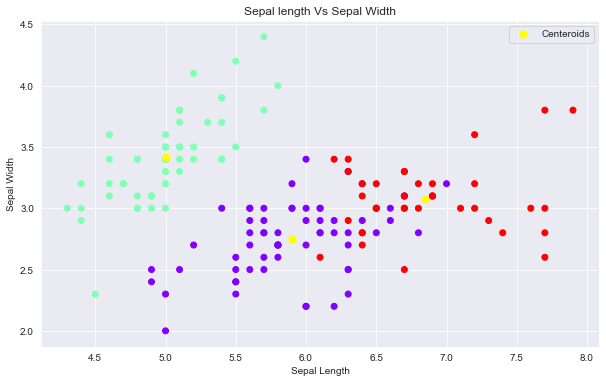

In [14]:
plt.figure(figsize = (10,6))
plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=y_kmeans,cmap='rainbow')
plt.scatter(centers[:,0],centers[:,1],c='yellow',s=50,label='Centeroids')
plt.title("Sepal length Vs Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()